### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

gamma is the discount factor. It quantifies how much importance we give for future rewards. It's also handy to approximate the noise in future rewards

2. Please breifly explain what is value function and what is Q function ?

The optimal value function (V*) , therefore, is one that gives us maximum achievable value (return) for each state in given state space (set of all possible states). A Q-value function (Q) shows us how good a certain action is, given a state, for an agent following a policy.

3. How temperal difference related to dynamic programming and monte-carlo methods ?

Temporal Difference is better than Dynamic Programming method because it does not require a model of the environment, nor the rewards and probability distributions. TD has also advantage over Monte Carlo methods since no need to wait until the end of the episode to know the return, only one time step is required.

4. Please briefly describe what are value iteration and policy iteration ?

Policy iteration includes: policy evaluation + policy improvement, and the two are repeated iteratively until policy converges.
Value iteration includes: finding optimal value function + one policy extraction. There is no repeat of the two because once the value function is optimal, then the policy out of it should also be optimal (i.e. converged).
Finding optimal value function can also be seen as a combination of policy improvement (due to max) and truncated policy evaluation (the reassignment of v_(s) after just one sweep of all states regardless of convergence).
The algorithms for policy evaluation and finding optimal value function are highly similar except for a max operation (as highlighted)
Similarly, the key step to policy improvement and policy extraction are identical except the former involves a stability check

5. How can we use deep lerning in reinforcement learning ?

Deep reinforcement learning. Deep reinforcement learning (DRL) uses deep learning and reinforcement learning principles to create efficient algorithms applied on areas like robotics, video games, NLP (computer science), computer vision, education, transportation, finance and healthcare

### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [2]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

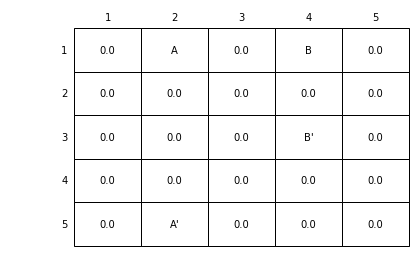

In [3]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

WORLD_SIZE = 5

A_POS = [0,1]
A_PRIME_POS = [4,1]
B_POS = [0,3]
B_PRIME_POS = [2,3]
DISCOUNT = 0.9

ACTIONS = [np.array([0,-1]),
           np.array([-1,0]),
           np.array([0,1]),
           np.array([1,0])]
ACTION_PROB = 0.25

def step(state,action):
    if state == A_POS:
        return A_PRIME_POS,10
    if state == B_POS:
        return B_PRIME_POS,5
    next_state = (np.array(state)+action).tolist()
    x,y = next_state
    if x < 0 or x >= WORLD_SIZE or \
            y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

In [5]:
def results():
    value= np.zeros((WORLD_SIZE,WORLD_SIZE))
    while True:
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    (next_i,next_J),reward = step([i,j],action)
                    new_value[i,j] += ACTION_PROB*(reward+DISCOUNT*value[next_i,next_J])

        if np.sum(np.abs(value-new_value)) < 1e-4:
            draw_image(np.round(new_value,decimals=2))
            plt.show()
            break
        value = new_value

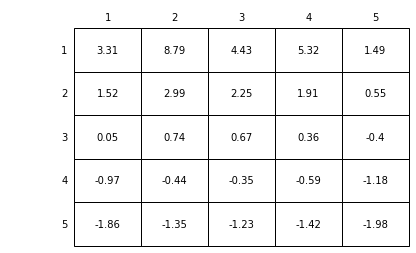

In [6]:
results()